In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')


import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

import pandas as pd
import numpy as np

from tigramite.models import Models, Prediction

import math
#import sklearn
#from sklearn.linear_model import LinearRegression

/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/plotting.py:26: UserWarning: [Errno 2] No such file or directory: '/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))
/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/independence_tests/gpdc.py:27: UserWarning: [Errno 2] No such file or directory: '/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/independence_tests/../../versions.py'
  warnings.warn(str(e))
/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/independence_tests/gpdc_torch.py:33: UserWarning: No module named 'torch'
  warnings.warn(str(e))
/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/models.py:29: UserWarning: [Errno 2] No such file or directory: '/home/saranya/anaconda3/envs/bmap/lib/python3.8/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))


In [2]:
def select_links(tau_min, tau_max, parents, children):
    """
    This function selects the causal links that will be tested by
    PCMCI. The links are selected such that per each variable in
    `children` all `parents` are stablished as causes, and no other
    causal relationships exist.
    
    Assumes `parents` and `children` are disjoint sets, and that all
    variables are included in the union of both sets.
    
    Parameters
    ----------
    tau_min : int
        Minimum time lag to test. Note that zero-lags are undirected.
    tau_max : int
        Maximum time lag. Must be larger or equal to tau_min.
    parents : set of int
        List of variables that will be assigned as a parent link.
        Assumed to be disjoint with children
    children : set of int
        List of variables that will be assigned a link from a parent.
        Assumed to be disjoint with parents
    Returns
    -------
    selected_links: dict
        Dictionary of selected links for Tigramite
        
    """

    parents = set(parents)
    children = set(children)

    selected_links = dict()
    # Set the default as all combinations of the selected variables
    for var in [*children, *parents]:
        if var in children:
            # Children can be caused only by parents and by themselves
            selected_links[var] = [
                (parent, -lag)
                for parent in parents
                for lag in range(tau_min, tau_max + 1)
            ]
        else:
            selected_links[var] = []

    return selected_links

In [3]:
p1="../../tigramite_timeseries/"
p2="../../targets/"

In [4]:
df1 = pd.read_csv(p1+"timeseries_all_wp_vongfong.csv",sep=',')
df1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df1=df1.drop('a', axis=1)
df1=df1.drop('conv_rrate', axis=1)
df1=df1.drop('ls_rrate', axis=1)
df1=df1.drop('mn_conv_prate', axis=1)
df1=df1.drop('mn_ls_prate', axis=1)
df1=df1.drop('mn_tot_prate', axis=1)
df1=df1.drop('outconv_rrate', axis=1)
df1=df1.drop('outls_rrate', axis=1)
df1=df1.drop('outmn_conv_prate', axis=1)
df1=df1.drop('outmn_ls_prate', axis=1)
df1=df1.drop('outmn_tot_prate', axis=1)
d1=pd.read_csv(p2+'2020_integrated_prate_nwp_vongfong.csv')
d1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d1=d1.drop('a', axis=1)
dt1=pd.concat([d1,df1],axis=1, join='inner')

In [5]:
df2 = pd.read_csv(p1+"timeseries_all_wp_chanhom.csv",sep=',')
df2.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df2=df2.drop('a', axis=1)
df2=df2.drop('conv_rrate', axis=1)
df2=df2.drop('ls_rrate', axis=1)
df2=df2.drop('mn_conv_prate', axis=1)
df2=df2.drop('mn_ls_prate', axis=1)
df2=df2.drop('mn_tot_prate', axis=1)
df2=df2.drop('outconv_rrate', axis=1)
df2=df2.drop('outls_rrate', axis=1)
df2=df2.drop('outmn_conv_prate', axis=1)
df2=df2.drop('outmn_ls_prate', axis=1)
df2=df2.drop('outmn_tot_prate', axis=1)
d2=pd.read_csv(p2+'2020_integrated_prate_nwp_chanhom.csv')
d2.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d2=d2.drop('a', axis=1)
dt2=pd.concat([d2,df2],axis=1, join='inner')

In [6]:
df3 = pd.read_csv(p1+"timeseries_all_wp_saudel.csv",sep=',')
df3.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df3=df3.drop('a', axis=1)
df3=df3.drop('conv_rrate', axis=1)
df3=df3.drop('ls_rrate', axis=1)
df3=df3.drop('mn_conv_prate', axis=1)
df3=df3.drop('mn_ls_prate', axis=1)
df3=df3.drop('mn_tot_prate', axis=1)
df3=df3.drop('outconv_rrate', axis=1)
df3=df3.drop('outls_rrate', axis=1)
df3=df3.drop('outmn_conv_prate', axis=1)
df3=df3.drop('outmn_ls_prate', axis=1)
df3=df3.drop('outmn_tot_prate', axis=1)
d3=pd.read_csv(p2+'2020_integrated_prate_nwp_saudel.csv')
d3.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d3=d3.drop('a', axis=1)
dt3=pd.concat([d3,df3],axis=1, join='inner')

In [7]:
df4 = pd.read_csv(p1+"timeseries_all_wp_molave.csv",sep=',')
df4.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df4=df4.drop('a', axis=1)
df4=df4.drop('conv_rrate', axis=1)
df4=df4.drop('ls_rrate', axis=1)
df4=df4.drop('mn_conv_prate', axis=1)
df4=df4.drop('mn_ls_prate', axis=1)
df4=df4.drop('mn_tot_prate', axis=1)
df4=df4.drop('outconv_rrate', axis=1)
df4=df4.drop('outls_rrate', axis=1)
df4=df4.drop('outmn_conv_prate', axis=1)
df4=df4.drop('outmn_ls_prate', axis=1)
df4=df4.drop('outmn_tot_prate', axis=1)
d4=pd.read_csv(p2+'2020_integrated_prate_nwp_molave.csv')
d4.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d4=d4.drop('a', axis=1)
dt4=pd.concat([d4,df4],axis=1, join='inner')

In [8]:
df5 = pd.read_csv(p1+"timeseries_all_wp_goni.csv",sep=',')
df5.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df5=df5.drop('a', axis=1)
df5=df5.drop('conv_rrate', axis=1)
df5=df5.drop('ls_rrate', axis=1)
df5=df5.drop('mn_conv_prate', axis=1)
df5=df5.drop('mn_ls_prate', axis=1)
df5=df5.drop('mn_tot_prate', axis=1)
df5=df5.drop('outconv_rrate', axis=1)
df5=df5.drop('outls_rrate', axis=1)
df5=df5.drop('outmn_conv_prate', axis=1)
df5=df5.drop('outmn_ls_prate', axis=1)
df5=df5.drop('outmn_tot_prate', axis=1)
d5=pd.read_csv(p2+'2020_integrated_prate_nwp_goni.csv')
d5.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d5=d5.drop('a', axis=1)
dt5=pd.concat([d5,df5],axis=1, join='inner')

In [9]:
df6 = pd.read_csv(p1+"timeseries_all_wp_atsani.csv",sep=',')
df6.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df6=df6.drop('a', axis=1)
df6=df6.drop('conv_rrate', axis=1)
df6=df6.drop('ls_rrate', axis=1)
df6=df6.drop('mn_conv_prate', axis=1)
df6=df6.drop('mn_ls_prate', axis=1)
df6=df6.drop('mn_tot_prate', axis=1)
df6=df6.drop('outconv_rrate', axis=1)
df6=df6.drop('outls_rrate', axis=1)
df6=df6.drop('outmn_conv_prate', axis=1)
df6=df6.drop('outmn_ls_prate', axis=1)
df6=df6.drop('outmn_tot_prate', axis=1)
d6=pd.read_csv(p2+'2020_integrated_prate_nwp_atsani.csv')
d6.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d6=d6.drop('a', axis=1)
dt6=pd.concat([d6,df6],axis=1, join='inner')

In [10]:
df7 = pd.read_csv(p1+"timeseries_all_wp_vamco.csv",sep=',')
df7.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df7=df7.drop('a', axis=1)
df7=df7.drop('conv_rrate', axis=1)
df7=df7.drop('ls_rrate', axis=1)
df7=df7.drop('mn_conv_prate', axis=1)
df7=df7.drop('mn_ls_prate', axis=1)
df7=df7.drop('mn_tot_prate', axis=1)
df7=df7.drop('outconv_rrate', axis=1)
df7=df7.drop('outls_rrate', axis=1)
df7=df7.drop('outmn_conv_prate', axis=1)
df7=df7.drop('outmn_ls_prate', axis=1)
df7=df7.drop('outmn_tot_prate', axis=1)
d7=pd.read_csv(p2+'2020_integrated_prate_nwp_vamco.csv')
d7.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d7=d7.drop('a', axis=1)
dt7=pd.concat([d7,df7],axis=1, join='inner')

In [13]:
df8 = pd.read_csv(p1+"timeseries_all_wp_neoguri.csv",sep=',')
df8.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df8=df8.drop('a', axis=1)
df8=df8.drop('conv_rrate', axis=1)
df8=df8.drop('ls_rrate', axis=1)
df8=df8.drop('mn_conv_prate', axis=1)
df8=df8.drop('mn_ls_prate', axis=1)
df8=df8.drop('mn_tot_prate', axis=1)
df8=df8.drop('outconv_rrate', axis=1)
df8=df8.drop('outls_rrate', axis=1)
df8=df8.drop('outmn_conv_prate', axis=1)
df8=df8.drop('outmn_ls_prate', axis=1)
df8=df8.drop('outmn_tot_prate', axis=1)
d8=pd.read_csv(p2+'2019_integrated_prate_nwp_neoguri.csv')
d8.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d8=d8.drop('a', axis=1)
dt8=pd.concat([d8,df8],axis=1, join='inner')

In [14]:
df9 = pd.read_csv(p1+"timeseries_all_wp_bualoi.csv",sep=',')
df9.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df9=df9.drop('a', axis=1)
df9=df9.drop('conv_rrate', axis=1)
df9=df9.drop('ls_rrate', axis=1)
df9=df9.drop('mn_conv_prate', axis=1)
df9=df9.drop('mn_ls_prate', axis=1)
df9=df9.drop('mn_tot_prate', axis=1)
df9=df9.drop('outconv_rrate', axis=1)
df9=df9.drop('outls_rrate', axis=1)
df9=df9.drop('outmn_conv_prate', axis=1)
df9=df9.drop('outmn_ls_prate', axis=1)
df9=df9.drop('outmn_tot_prate', axis=1)
d9=pd.read_csv(p2+'2019_integrated_prate_nwp_bualoi.csv')
d9.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d9=d9.drop('a', axis=1)
dt9=pd.concat([d9,df9],axis=1, join='inner')

In [16]:
df10 = pd.read_csv(p1+"timeseries_all_wp_halong.csv",sep=',')
df10.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df10=df10.drop('a', axis=1)
df10=df10.drop('conv_rrate', axis=1)
df10=df10.drop('ls_rrate', axis=1)
df10=df10.drop('mn_conv_prate', axis=1)
df10=df10.drop('mn_ls_prate', axis=1)
df10=df10.drop('mn_tot_prate', axis=1)
df10=df10.drop('outconv_rrate', axis=1)
df10=df10.drop('outls_rrate', axis=1)
df10=df10.drop('outmn_conv_prate', axis=1)
df10=df10.drop('outmn_ls_prate', axis=1)
df10=df10.drop('outmn_tot_prate', axis=1)
d10=pd.read_csv(p2+'2019_integrated_prate_nwp_halong.csv')
d10.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d10=d10.drop('a', axis=1)
dt10=pd.concat([d10,df10],axis=1, join='inner')

In [17]:
df11 = pd.read_csv(p1+"timeseries_all_wp_nakri.csv",sep=',')
df11.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df11=df11.drop('a', axis=1)
df11=df11.drop('conv_rrate', axis=1)
df11=df11.drop('ls_rrate', axis=1)
df11=df11.drop('mn_conv_prate', axis=1)
df11=df11.drop('mn_ls_prate', axis=1)
df11=df11.drop('mn_tot_prate', axis=1)
df11=df11.drop('outconv_rrate', axis=1)
df11=df11.drop('outls_rrate', axis=1)
df11=df11.drop('outmn_conv_prate', axis=1)
df11=df11.drop('outmn_ls_prate', axis=1)
df11=df11.drop('outmn_tot_prate', axis=1)
d11=pd.read_csv(p2+'2019_integrated_prate_nwp_nakri.csv')
d11.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d11=d11.drop('a', axis=1)
dt11=pd.concat([d11,df11],axis=1, join='inner')

In [18]:
df12 = pd.read_csv(p1+"timeseries_all_wp_fengshen.csv",sep=',')
df12.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df12=df12.drop('a', axis=1)
df12=df12.drop('conv_rrate', axis=1)
df12=df12.drop('ls_rrate', axis=1)
df12=df12.drop('mn_conv_prate', axis=1)
df12=df12.drop('mn_ls_prate', axis=1)
df12=df12.drop('mn_tot_prate', axis=1)
df12=df12.drop('outconv_rrate', axis=1)
df12=df12.drop('outls_rrate', axis=1)
df12=df12.drop('outmn_conv_prate', axis=1)
df12=df12.drop('outmn_ls_prate', axis=1)
df12=df12.drop('outmn_tot_prate', axis=1)
d12=pd.read_csv(p2+'2019_integrated_prate_nwp_fengshen.csv')
d12.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d12=d12.drop('a', axis=1)
dt12=pd.concat([d12,df12],axis=1, join='inner')

In [19]:
df13 = pd.read_csv(p1+"timeseries_all_wp_kalmaegi.csv",sep=',')
df13.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df13=df13.drop('a', axis=1)
df13=df13.drop('conv_rrate', axis=1)
df13=df13.drop('ls_rrate', axis=1)
df13=df13.drop('mn_conv_prate', axis=1)
df13=df13.drop('mn_ls_prate', axis=1)
df13=df13.drop('mn_tot_prate', axis=1)
df13=df13.drop('outconv_rrate', axis=1)
df13=df13.drop('outls_rrate', axis=1)
df13=df13.drop('outmn_conv_prate', axis=1)
df13=df13.drop('outmn_ls_prate', axis=1)
df13=df13.drop('outmn_tot_prate', axis=1)
d13=pd.read_csv(p2+'2019_integrated_prate_nwp_kalmaegi.csv')
d13.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d13=d13.drop('a', axis=1)
dt13=pd.concat([d13,df13],axis=1, join='inner')

In [20]:
df14 = pd.read_csv(p1+"timeseries_all_wp_fungwong.csv",sep=',')
df14.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df14=df14.drop('a', axis=1)
df14=df14.drop('conv_rrate', axis=1)
df14=df14.drop('ls_rrate', axis=1)
df14=df14.drop('mn_conv_prate', axis=1)
df14=df14.drop('mn_ls_prate', axis=1)
df14=df14.drop('mn_tot_prate', axis=1)
df14=df14.drop('outconv_rrate', axis=1)
df14=df14.drop('outls_rrate', axis=1)
df14=df14.drop('outmn_conv_prate', axis=1)
df14=df14.drop('outmn_ls_prate', axis=1)
df14=df14.drop('outmn_tot_prate', axis=1)
d14=pd.read_csv(p2+'2019_integrated_prate_nwp_fungwong.csv')
d14.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d14=d14.drop('a', axis=1)
dt14=pd.concat([d14,df14],axis=1, join='inner')

In [21]:
df15 = pd.read_csv(p1+"timeseries_all_wp_kammuri.csv",sep=',')
df15.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df15=df15.drop('a', axis=1)
df15=df15.drop('conv_rrate', axis=1)
df15=df15.drop('ls_rrate', axis=1)
df15=df15.drop('mn_conv_prate', axis=1)
df15=df15.drop('mn_ls_prate', axis=1)
df15=df15.drop('mn_tot_prate', axis=1)
df15=df15.drop('outconv_rrate', axis=1)
df15=df15.drop('outls_rrate', axis=1)
df15=df15.drop('outmn_conv_prate', axis=1)
df15=df15.drop('outmn_ls_prate', axis=1)
df15=df15.drop('outmn_tot_prate', axis=1)
d15=pd.read_csv(p2+'2019_integrated_prate_nwp_kammuri.csv')
d15.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d15=d15.drop('a', axis=1)
dt15=pd.concat([d15,df15],axis=1, join='inner')

In [22]:
tc1=dt1.values
tc2=dt2.values
tc3=dt3.values
tc4=dt4.values
tc5=dt5.values
tc6=dt6.values
tc7=dt7.values
tc8=dt8.values
tc9=dt9.values
tc10=dt10.values
tc11=dt11.values
tc12=dt12.values
tc13=dt13.values
tc14=dt14.values
tc15=dt15.values

In [39]:
dt7

,Prec_Intg,Pmin,w10max,div100,div200,div250,div300,div400,div500,eqt1000,...,outvvel_250,outvvel_300,outvvel_400,outvvel_500,outvvel_600,outvvel_700,outvvel_850,outvvel_925,outvvel_975,outvvel_1000
0,373.853929,1008.139375,12.301943,0.000034,3.935914e-05,2.301252e-05,-0.000003,-0.000007,-0.000008,335.176880,...,-0.108072,-0.136401,-0.162858,-0.158399,-0.119224,-0.072216,-0.028436,-0.013155,-0.000843,0.005923
1,340.492781,1007.281250,12.164107,0.000030,3.894729e-05,3.033575e-05,0.000009,-0.000004,0.000002,335.679382,...,-0.101543,-0.127403,-0.153648,-0.137682,-0.099519,-0.064408,-0.042974,-0.035638,-0.030218,-0.027503
2,373.760760,1005.983125,11.694481,0.000037,4.089281e-05,3.292633e-05,0.000012,-0.000004,-0.000004,335.140381,...,-0.097735,-0.118789,-0.148284,-0.132988,-0.090388,-0.051766,-0.024944,-0.015646,-0.010232,-0.007653
3,459.975842,1006.540625,12.752129,0.000044,2.951113e-05,1.533757e-05,0.000003,0.000005,-0.000002,335.450409,...,-0.106899,-0.127348,-0.152186,-0.131925,-0.087418,-0.050186,-0.020528,-0.006549,0.002084,0.006561
4,452.484693,1008.196875,12.502798,0.000042,3.501577e-05,3.285955e-05,0.000022,0.000015,-0.000008,335.887512,...,-0.110143,-0.122042,-0.126769,-0.116716,-0.078044,-0.047339,-0.016240,-0.005097,-0.000578,0.002069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,73.678158,1011.961250,13.873990,-0.000009,-4.118349e-07,6.354632e-06,0.000002,0.000003,0.000004,307.785950,...,-0.001947,-0.014250,-0.003842,-0.001693,0.008652,0.007453,-0.015153,-0.015924,0.011534,0.025228
63,88.635273,1011.471250,14.389834,-0.000012,1.114982e-06,5.508081e-06,0.000002,0.000004,0.000006,303.966522,...,0.004571,-0.009670,-0.003470,-0.000130,0.012333,0.013138,-0.006862,-0.002462,0.025341,0.039663
64,91.990381,1012.944375,13.112446,-0.000010,-1.615069e-06,-3.792945e-07,-0.000002,0.000005,0.000010,300.972595,...,0.014571,0.000968,-0.003358,0.003358,0.013361,0.014282,0.012042,0.020981,0.042444,0.053169
65,87.696072,1014.429375,12.451212,-0.000010,-3.569903e-06,-4.802502e-07,-0.000006,0.000005,0.000008,298.801605,...,0.007081,-0.001068,-0.011161,-0.006752,0.000438,0.001844,-0.009627,-0.015025,-0.009482,-0.004306


In [40]:
tc1=dt1.values
tc2=dt2.values
tc3=dt3.values
tc4=dt4.values
tc5=dt5.values
tc6=dt6.values
tc7=dt7.values

In [35]:
print(tc1.shape)
print(tc2.shape)
print(tc3.shape)
print(tc4.shape)
print(tc5.shape)
print(tc6.shape)
print(tc7.shape)
print(tc8.shape)
print(tc9.shape)
print(tc10.shape)
print(tc11.shape)
print(tc12.shape)
print(tc13.shape)
print(tc14.shape)
print(tc15.shape)


(81, 261)
(110, 261)
(79, 261)
(59, 261)
(97, 261)
(74, 261)
(67, 261)
(49, 261)
(66, 261)
(66, 261)
(59, 261)
(64, 261)
(64, 261)
(53, 261)
(97, 261)


In [23]:
var_names=dt1.columns.values.tolist()

In [25]:
dd={'cyclone1':tc1,'cyclone2':tc2,'cyclone3':tc3,'cyclone4':tc4,'cyclone5':tc5,'cyclone6':tc6,
   'cyclone7':tc7,'cyclone8':tc8,'cyclone9':tc9,'cyclone10':tc10,'cyclone11':tc11,'cyclone12':tc12,
   'cyclone13':tc13,'cyclone14':tc14,'cyclone15':tc15}

In [26]:
data=dd
dataframe = pp.DataFrame(data,analysis_mode ='multiple', var_names=var_names)
tau_max0 = 16
tau_min0 = 1

In [27]:
for member in dataframe.values.keys():
    children = [0,1,2]
    parents = np.arange(3,261)
    sel_links = select_links(tau_min0, tau_max0, parents, children)

In [28]:

pc_alpha = 0.01
pcmci = PCMCI(dataframe = dataframe, cond_ind_test = ParCorr())
results = pcmci.run_pcmciplus(selected_links = sel_links, tau_min = tau_min0, tau_max = tau_max0,  pc_alpha = pc_alpha)
pcmci.verbosity = 2

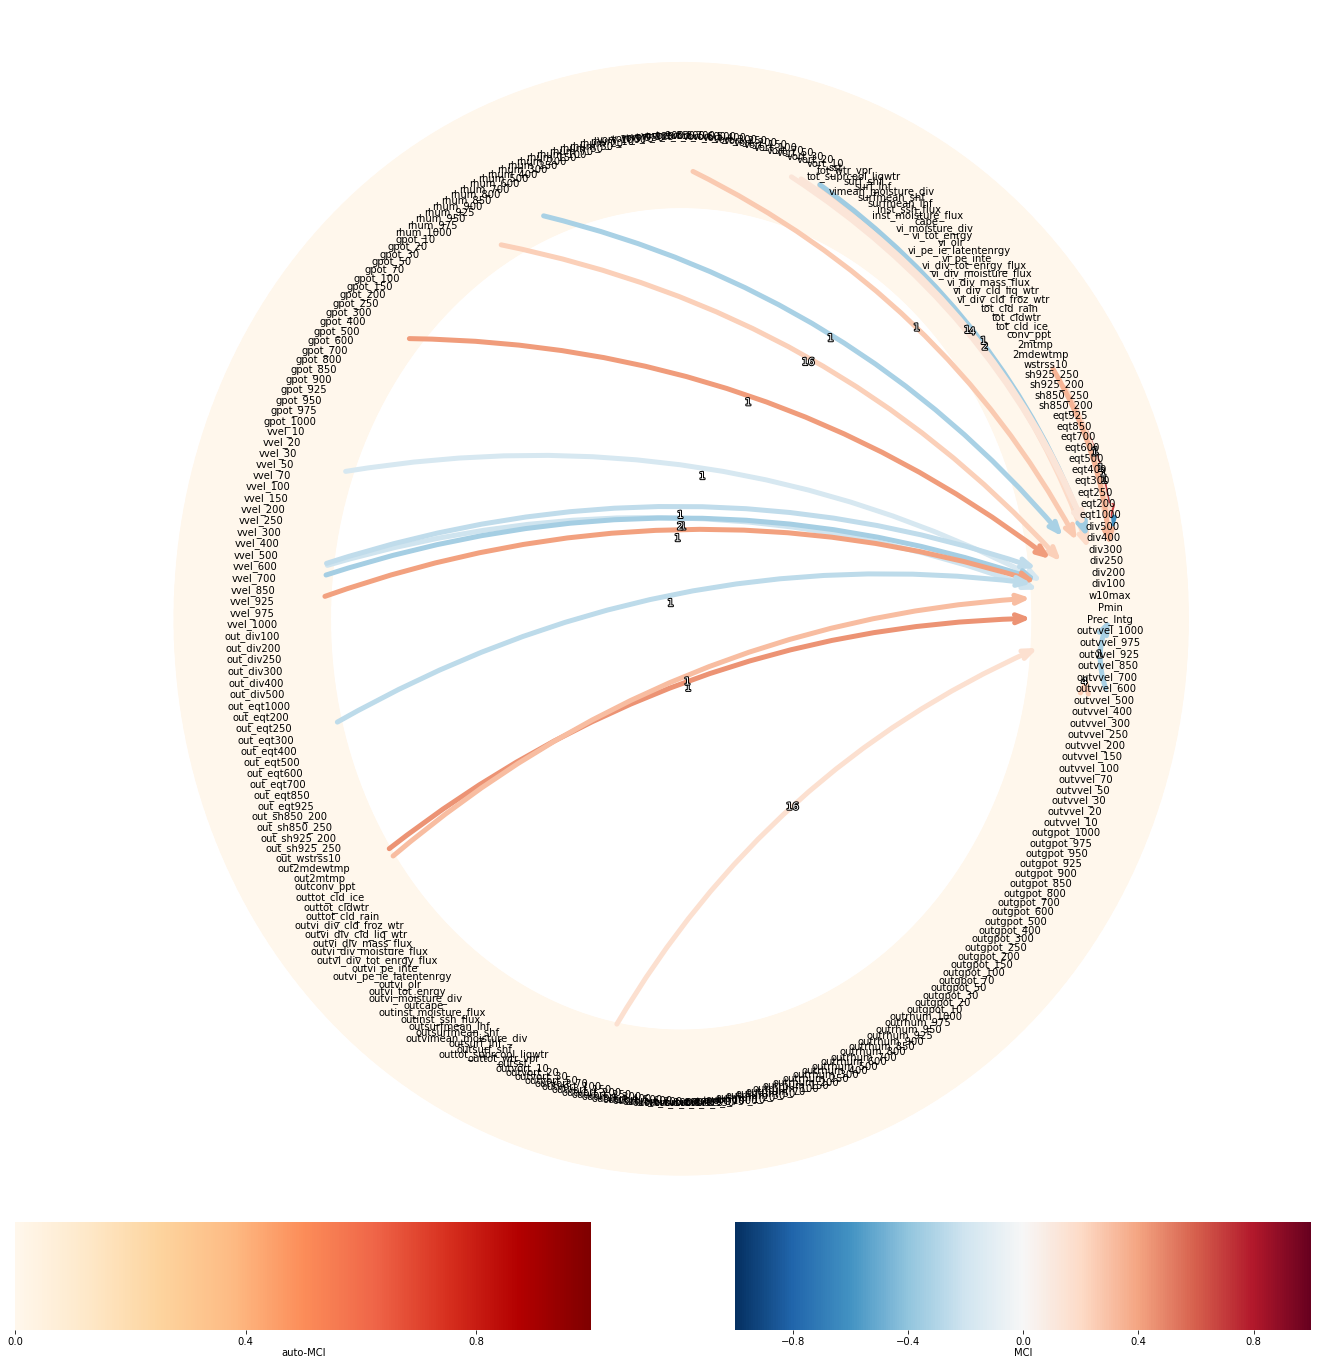

In [29]:
fig=plt.rcParams["figure.figsize"] = (20,25)
tp.plot_graph(graph=results['graph'], val_matrix=results['val_matrix'], var_names=var_names)
plt.show()

In [30]:
pcmci.print_significant_links(p_matrix=results['p_matrix'],
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable Prec_Intg has 9 link(s):
        (outtot_cld_ice -1): pval = 0.00000 | val =  0.449
        (tot_cld_rain -1): pval = 0.00000 | val =  0.337
        (outvvel_600 -1): pval = 0.00000 | val = -0.321
        (rhum_1000 -16): pval = 0.00000 | val =  0.235
        (vvel_850 -1): pval = 0.00000 | val = -0.205
        (vort_200 -2): pval = 0.00000 | val =  0.194
        (vvel_100 -1): pval = 0.00005 | val = -0.165
        (outvort_150 -16): pval = 0.00012 | val =  0.156
        (conv_ppt -1): pval = 0.00806 | val =  0.108

    Variable Pmin has 7 link(s):
        (wstrss10 -1): pval = 0.00000 | val = -0.606
        (gpot_600 -1): pval = 0.00000 | val =  0.425
        (vvel_1000 -1): pval = 0.00000 | val =  0.412
        (vort_200 -1): pval = 0.00000 | val = -0.354
        (vvel_925 -2): pval = 0.00000 | val = -0.342
        (vort_1000 -1): pval = 0.00000 | val =  0.264
        (outvvel_150 -4): pval = 0.00000 | val =  0.252

    Variable w1

In [31]:
pcmci.verbosity = 1
results = pcmci.run_pc_stable(selected_links = sel_links, tau_max=tau_max0, tau_min=tau_min0, pc_alpha=0.05)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
selected_links = {0: [(3, -1), (3, -2), (3, -3), (3, -4), (3, -5), (3, -6), (3, -7), (3, -8), (3, -9), (3, -10), (3, -11), (3, -12), (3, -13), (3, -14), (3, -15), (3, -16), (4, -1), (4, -2), (4, -3), (4, -4), (4, -5), (4, -6), (4, -7), (4, -8), (4, -9), (4, -10), (4, -11), (4, -12), (4, -13), (4, -14), (4, -15), (4, -16), (5, -1), (5, -2), (5, -3), (5, -4), (5, -5), (5, -6), (5, -7), (5, -8), (5, -9), (5, -10), (5, -11), (5, -12), (5, -13), (5, -14), (5, -15), (5, -16), (6, -1), (6, -2), (6, -3), (6, -4), (6, -5), (6, -6), (6, -7), (6, -8), (6, -9), (6, -10), (6, -11), (6, -12), (6, -13), (6, -14), (6, -15), (6, -16), (7, -1), (7, -2), (7, -3), (7, -4), (7, -5), (7, -6), (7, -7), (7, -8), (7, -9), (7, -10), (7, -11), (7, -12), (7, -13), (7, -14), (7, -15), (7, -16), (8, -1), (8, -2), (8, -3), (8, -4), (8, -5), (8, -6), (8, -7), (8, -8), (8, -9), (8, -10), (8, -11), (8, -12), (8, -13), (8, -14), (8, -15), (8, -16), (9, 


## Resulting lagged parent (super)sets:

    Variable Prec_Intg has 10 link(s):
        (tot_cld_rain -1): max_pval = 0.00000, min_val =  0.289
        (conv_ppt -1): max_pval = 0.00091, min_val =  0.136
        (vvel_100 -1): max_pval = 0.00096, min_val = -0.135
        (rhum_1000 -16): max_pval = 0.00101, min_val =  0.133
        (vvel_850 -1): max_pval = 0.00245, min_val = -0.124
        (outtot_cld_rain -1): max_pval = 0.01122, min_val =  0.103
        (outvi_div_moisture_flux -1): max_pval = 0.01168, min_val = -0.103
        (div400 -2): max_pval = 0.01991, min_val = -0.096
        (vi_div_moisture_flux -7): max_pval = 0.03863, min_val = -0.085
        (outvvel_975 -6): max_pval = 0.04390, min_val = -0.082

    Variable Pmin has 16 link(s):
        (wstrss10 -1): max_pval = 0.00000, min_val = -0.274
        (vort_1000 -1): max_pval = 0.00000, min_val =  0.193
        (vvel_1000 -1): max_pval = 0.00009, min_val =  0.159
        (vort_200 -1): max_pval = 0.00015, min_val = -0.155
 

In [32]:
pcmci.verbosity = 1
pc_alpha = 0.001
pcmci = PCMCI(dataframe = dataframe, cond_ind_test = ParCorr())
results = pcmci.run_pcmci(selected_links = sel_links, tau_min = tau_min0, tau_max = tau_max0,  pc_alpha = pc_alpha)


In [33]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'],selected_links = sel_links, tau_min=tau_min0,tau_max=tau_max0, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.001)
graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=0.001,
                                     tau_min=tau_min0,tau_max=tau_max0, selected_links=sel_links)
results['graph'] = graph


## Significant links at alpha = 0.001:

    Variable Prec_Intg has 380 link(s):
        (outtot_cld_ice -1): pval = 0.00000 | val =  0.439
        (tot_cld_rain -1): pval = 0.00000 | val =  0.392
        (outvvel_600 -1): pval = 0.00000 | val = -0.302
        (vvel_850 -1): pval = 0.00000 | val = -0.246
        (conv_ppt -1): pval = 0.00000 | val =  0.233
        (tot_cld_rain -7): pval = 0.00000 | val =  0.224
        (vvel_700 -7): pval = 0.00000 | val = -0.224
        (vvel_600 -7): pval = 0.00000 | val = -0.223
        (outgpot_10 -4): pval = 0.00000 | val =  0.223
        (outgpot_10 -3): pval = 0.00000 | val =  0.219
        (vi_div_moisture_flux -15): pval = 0.00000 | val = -0.218
        (gpot_10 -4): pval = 0.00000 | val =  0.216
        (outvi_div_moisture_flux -1): pval = 0.00000 | val = -0.216
        (outrhum_20 -3): pval = 0.00000 | val = -0.215
        (tot_cld_rain -8): pval = 0.00000 | val =  0.215
        (vi_div_moisture_flux -7): pval = 0.00000 | val = -0.214
     

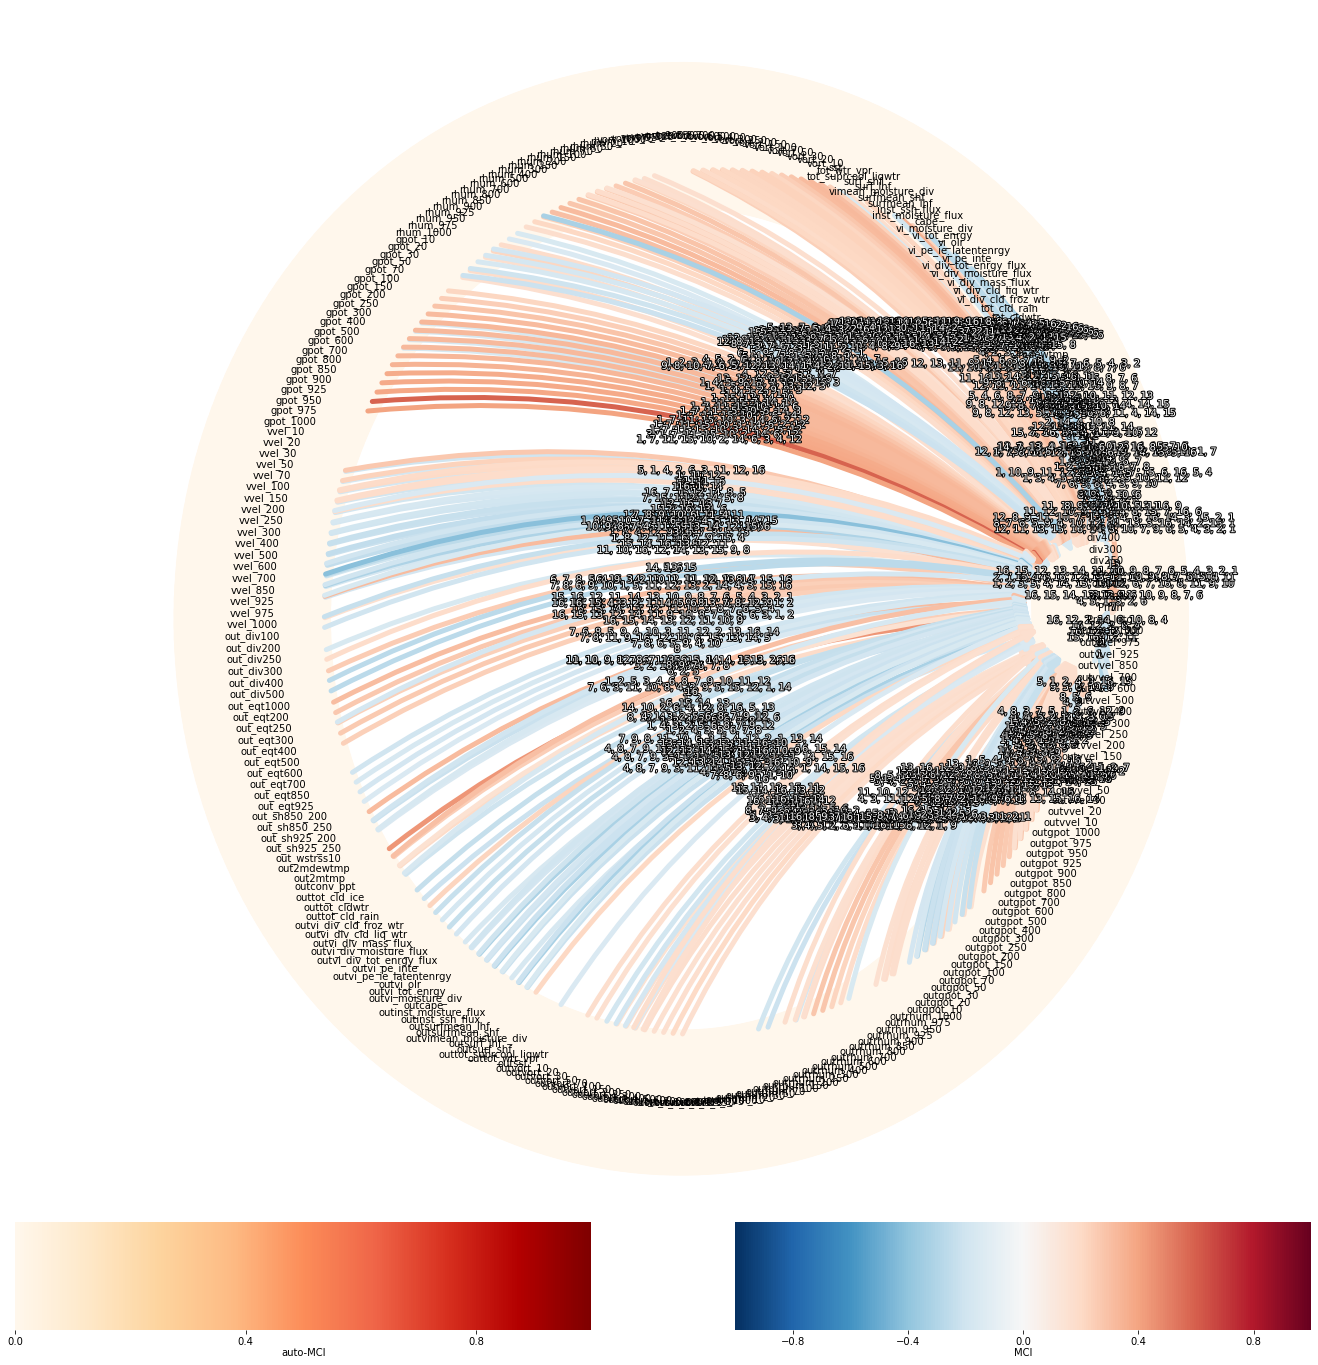

In [34]:
fig=plt.rcParams["figure.figsize"] = (20,25)
tp.plot_graph(graph=results['graph'], val_matrix=results['val_matrix'], var_names=var_names)
plt.show()